In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import additional_code
import random 


['bayesian_100.csv', 'bayesian_20.csv', 'bayesian_200.csv', 'bayesian_50.csv', 'bestconfig_100.csv', 'bestconfig_1000.csv', 'bestconfig_20.csv', 'bestconfig_200.csv', 'bestconfig_50.csv', 'bestconfig_500.csv', 'bestconfig_fast_100.csv', 'bestconfig_fast_1000.csv', 'bestconfig_fast_20.csv', 'bestconfig_fast_200.csv', 'bestconfig_fast_50.csv', 'bestconfig_fast_500.csv', 'flash_100.csv', 'flash_1000.csv', 'flash_20.csv', 'flash_200.csv', 'flash_50.csv', 'flash_500.csv', 'flash_linear_100.csv', 'flash_linear_1000.csv', 'flash_linear_20.csv', 'flash_linear_200.csv', 'flash_linear_50.csv', 'flash_linear_500.csv', 'fourier_100.csv', 'fourier_1000.csv', 'fourier_20.csv', 'fourier_200.csv', 'fourier_50.csv', 'fourier_500.csv', 'random_100.csv', 'random_1000.csv', 'random_20.csv', 'random_200.csv', 'random_50.csv', 'random_500.csv']
Methods to compare: ['bestconfig', 'bestconfig_fast', 'bayesian', 'flash', 'flash_linear', 'fourier']


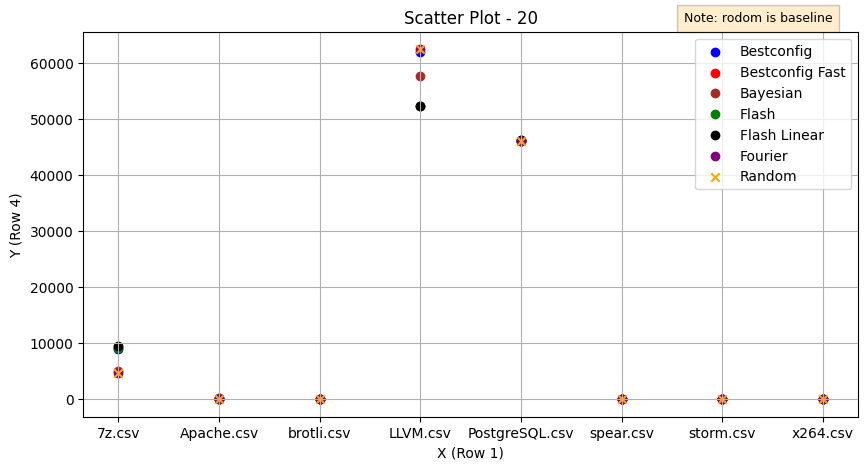

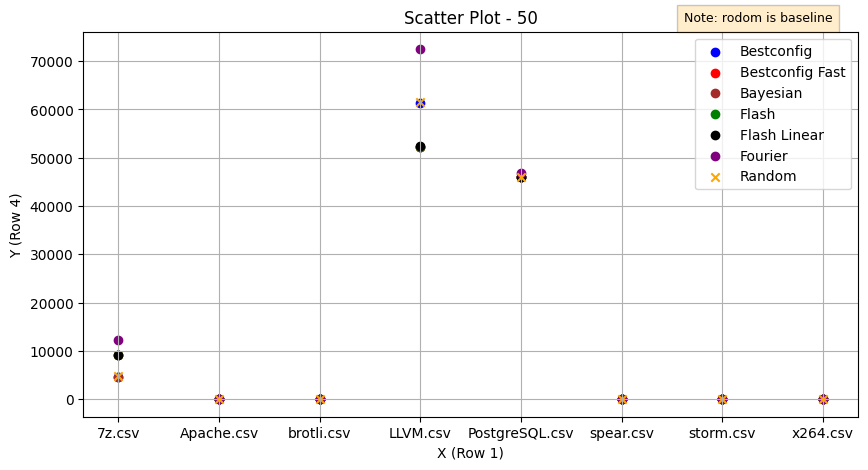

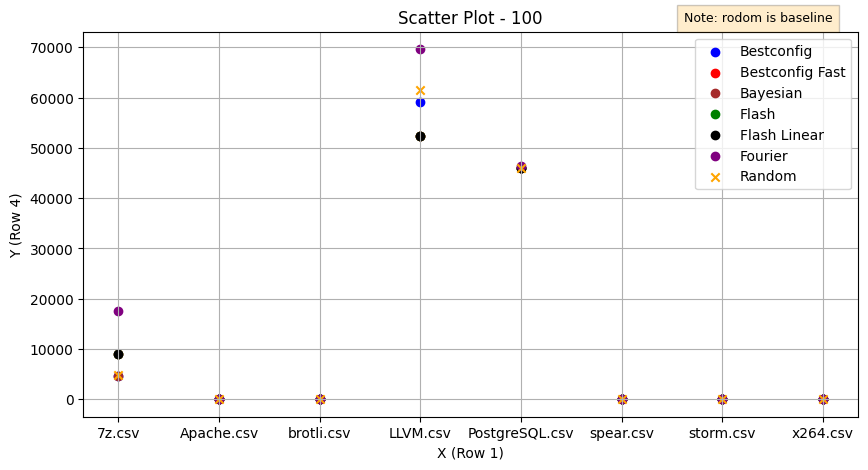

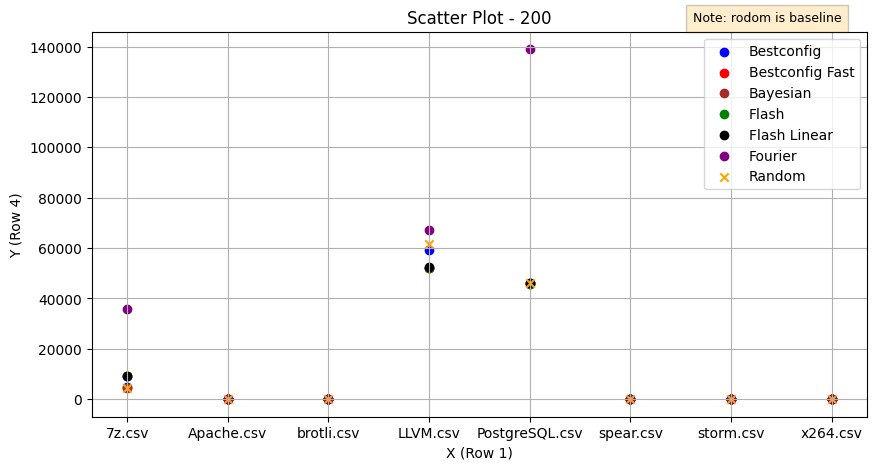

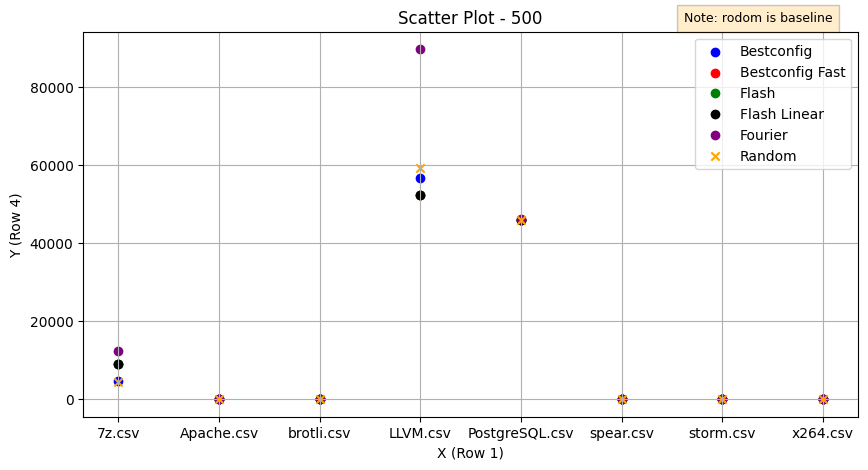

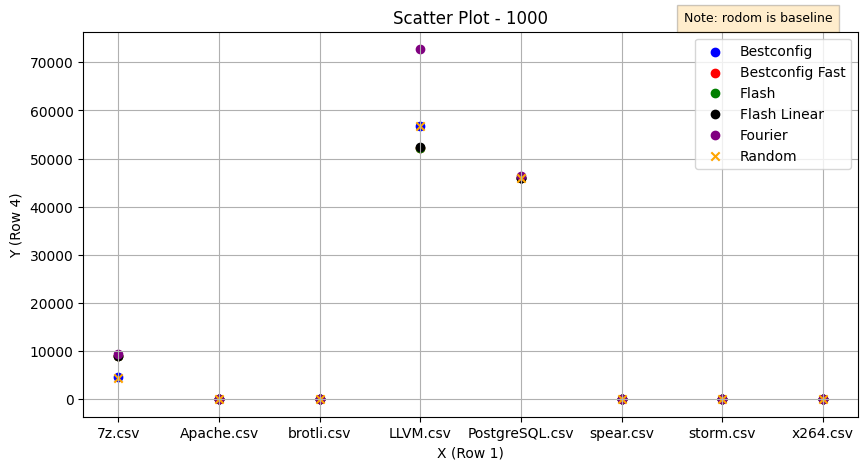

In [34]:
# Load CSV files
folder_path = 'results'
_, file_list = additional_code.list_files(folder_path)
results_img_path = 'results_img'
if not os.path.exists(results_img_path):
    print(f"Creating directory {results_img_path}")
    os.makedirs(results_img_path)

print(file_list)
dataframes = {}
for file in file_list:
    # Remove extension as key, e.g. 'bestconfig_100'
    key = os.path.splitext(file)[0]
    dataframes[key] = pd.read_csv(os.path.join(folder_path, file), header=None)
    # print(f"Loaded {file} with shape {dataframes[key].shape}")

x = {}
y = {}
for key, df in dataframes.items():
    x[key] = df.iloc[0].astype(str)
    y[key] = df.iloc[2].astype(float)


methods = {
    'bestconfig': ('blue', 'o'),
    'bestconfig_fast': ('red', 'o'),
    'bayesian': ('brown', 'o'),
    'flash': ('green', 'o'),
    'flash_linear': ('black', 'o'),
    'fourier': ('purple', 'o'),
    'random': ('orange', 'x'),

    # 'boca': ('pink', 'o'),
    # TODO: Add Boca
}

methods_to_compare = [k for k, v in methods.items() if v[1] == 'o']
print(f"Methods to compare: {methods_to_compare}")
budgets = [20, 50, 100, 200, 500, 1000]


for budget in budgets:
    plt.figure(figsize=(10, 5))
    for method, (color, marker) in methods.items():
        key = f"{method}_{budget}"
        if not (method == 'bayesian' and (budget == 1000 or budget == 500)):
            plt.scatter(x[key], y[key], color=color, marker=marker,
                        label=method.replace('_', ' ').title())
    plt.title(f'Scatter Plot - {budget}')
    plt.xlabel('X (Row 1)')
    plt.ylabel('Y (Row 4)')
    plt.legend()
    plt.grid(True)
    plt.figtext(
        0.8, 0.9,
        f"Note: rodom is baseline", ha="center", fontsize=9, bbox={"facecolor": "orange", "alpha": 0.2, "pad": 5}
    )
    plt.savefig(os.path.join(results_img_path,
                f"results_in_budget_{budget}.png"))
    plt.show()

Using colormap: cool


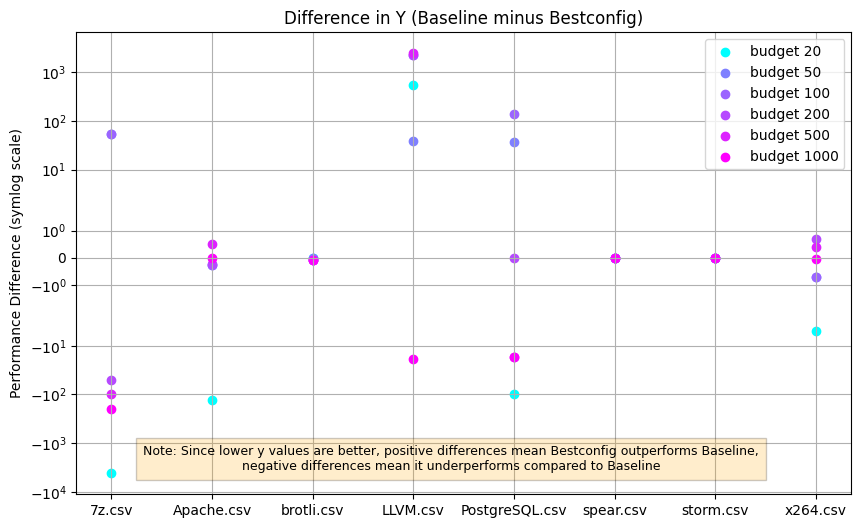

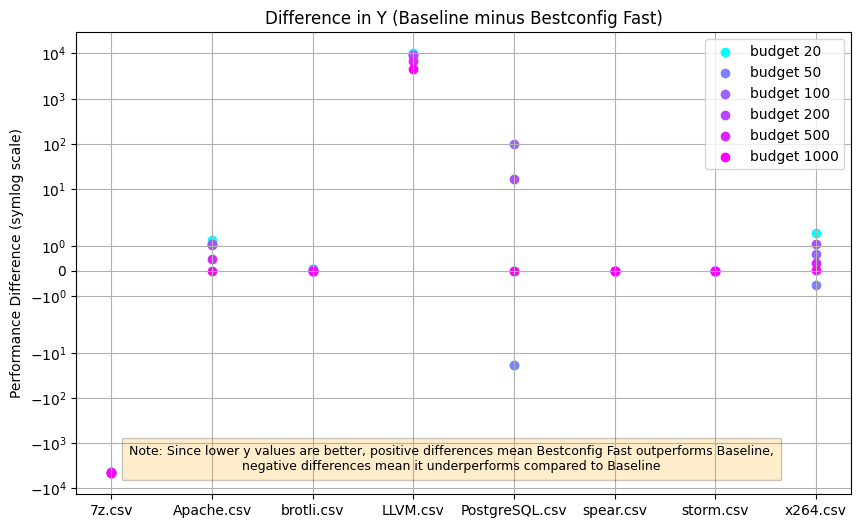

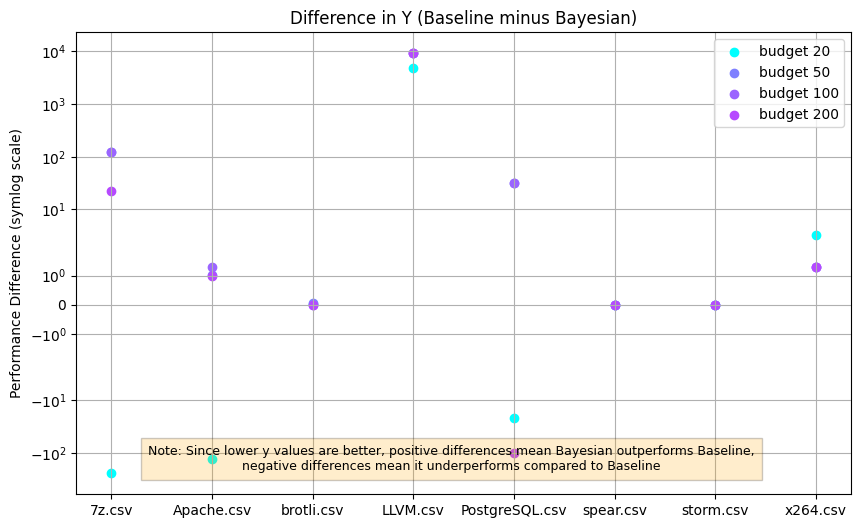

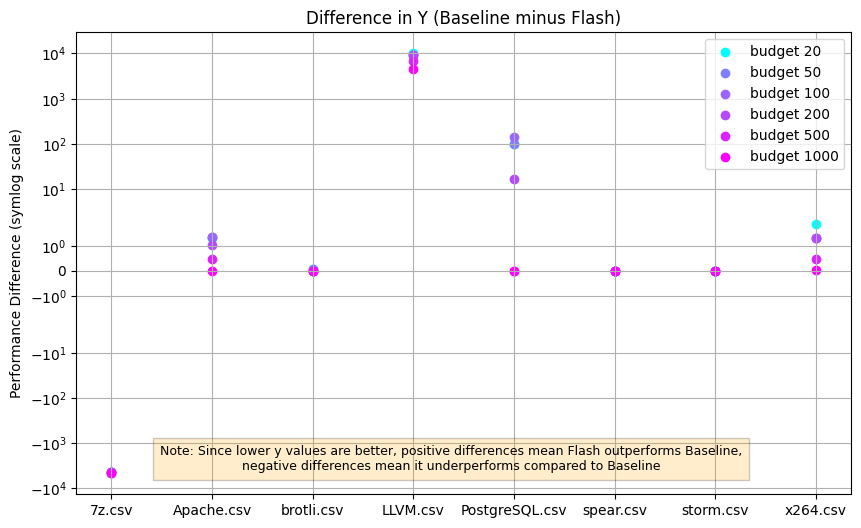

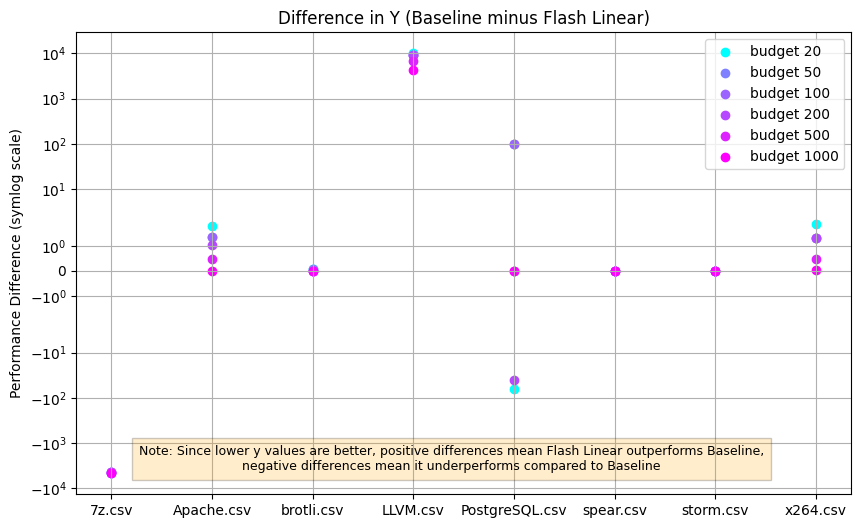

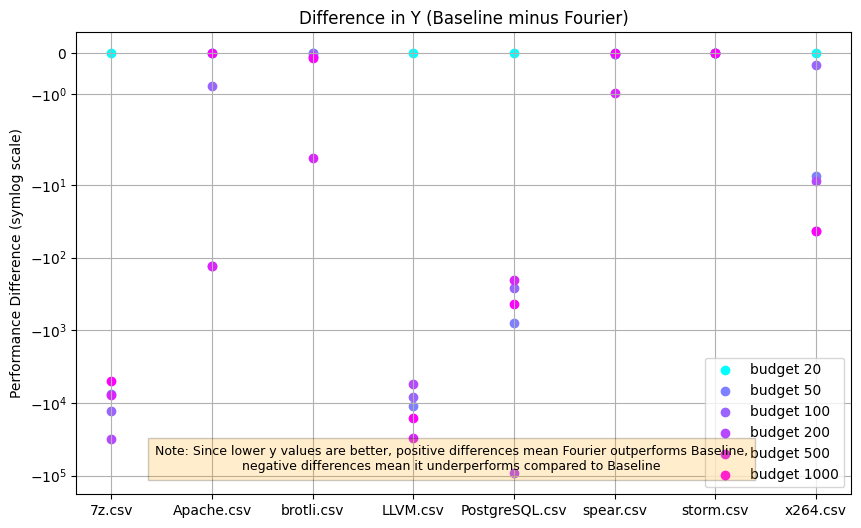

In [35]:
# deviation = {method_budget: baseline - method_budget}
deviation = {}

for method in methods:
    if method == 'baseline':
        continue  # skip baseline - baseline
    for budget in budgets:
        if not (method == 'bayesian' and (budget == 1000 or budget == 500)):
            key = f"{method}_{budget}"
            baseline_key = f"random_{budget}"
            # positive means method outperforms baseline, negative means underperforms
            deviation[key] = y[baseline_key] - y[key]


colormap = ('viridis', 'plasma', 'cool',
            'inferno', 'turbo', 'magma', 'cividis')
if "you dont like the color cool " == "you can change it":
    color = colormap[random.randint(0, len(colormap) - 1)]
color = 'cool'
print(f"Using colormap: {color}")
cmap = plt.get_cmap(color)


# make a color map of fixed colors, in square root space
def exp_norm(value, min_val, max_val, gamma=2.5):
    normed = (value - min_val) / (max_val - min_val)
    return normed ** gamma  # γ > 1 means more emphasis on lower values


min_b, max_b = min(budgets), max(budgets)
colors = {b: cmap(exp_norm(b, min_b, max_b, gamma=0.2)) for b in budgets}

if False == True:
    for b in budgets:
        print(f"Budget: {b}, Color: {colors[b]}")

for method in methods_to_compare:
    plt.figure(figsize=(10, 6))
    all_values = []

    for budget in budgets:
        base_key = f'random_{budget}'
        comp_key = f'{method}_{budget}'
        if not (method == 'bayesian' and (budget == 1000 or budget == 500)):
            diff = deviation[comp_key]
            all_values.extend(diff)

            plt.scatter(x[base_key], diff, color=colors[budget],
                        label=f'budget {budget}')

    # auto scale y axis in log scale if there are negative values
    if any(val < 0 for val in all_values):
        plt.yscale('symlog')
        plt.ylabel('Performance Difference (symlog scale)')
    else:
        plt.yscale('log')
        plt.ylabel('Performance Difference')

    # set title, labels, legend, grid, and save the plot
    plt.title(
        f'Difference in Y (Baseline minus {method.replace("_", " ").title()})')
    plt.legend()
    plt.grid(True)
    plt.figtext(
        0.5, 0.15,
        f"Note: Since lower y values are better, positive differences mean {method.replace('_', ' ').title()} "
        f"outperforms Baseline,\nnegative differences mean it underperforms compared to Baseline",
        ha="center", fontsize=9, bbox={"facecolor": "orange", "alpha": 0.2, "pad": 5}
    )
    plt.savefig(os.path.join(results_img_path, f"diff_{method}.png"))
    plt.show()